# Data Visualization using Matplotlib

In [55]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [2]:
x = [1,2,3,4,5]
y = [6,7,8,9,10]

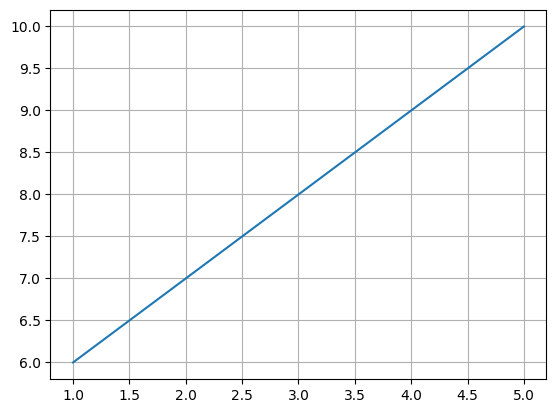

In [3]:
plt.plot(x,y)
plt.grid()
plt.show()

## Pyplot API

### Univariate: Numerical

In [4]:
data = {
    "Salary": [
        25000,
        30000,
        37000,
        28000,
        39000,
        48000,
        55000,
        52000,
        35000,
        47000,
        31000,
        42000,
        46000,
        60000,
        58000,
        33000,
        36000,
        41000,
        49000,
        53000,
    ]
}


In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,Salary
0,25000
1,30000
2,37000
3,28000
4,39000


In [7]:
df.shape

(20, 1)

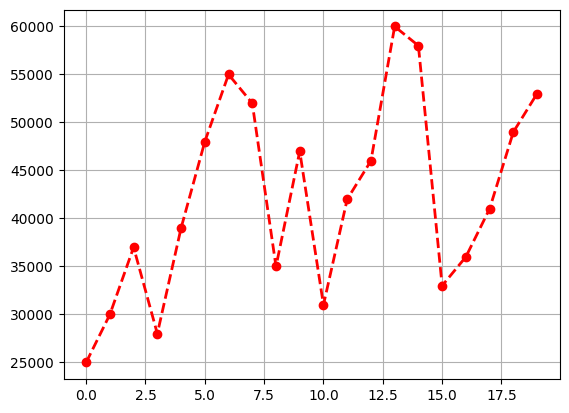

In [8]:
# line plot
plt.plot(df["Salary"], color="red", marker="o", linestyle="--", linewidth=2)
plt.grid()
plt.show()

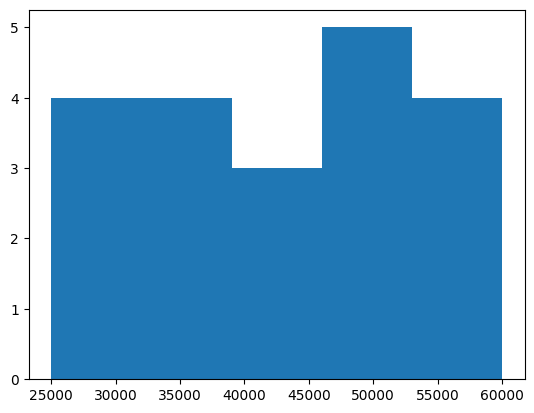

In [9]:
# histogram
plt.hist(df["Salary"], bins=5)
plt.show()

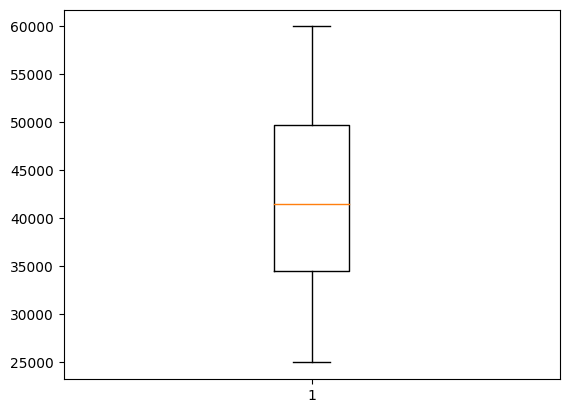

In [10]:
# boxplot
plt.boxplot(df["Salary"])
plt.show()

In [11]:
df.loc[20] = 0

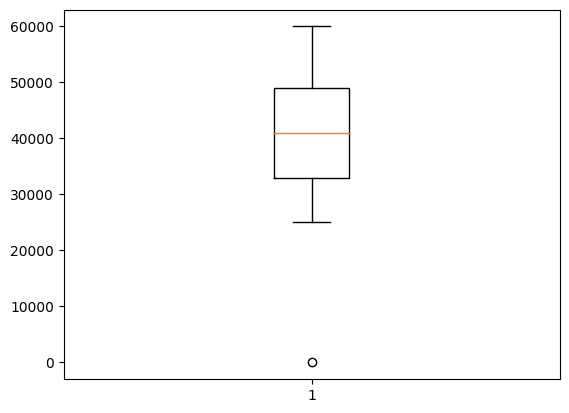

In [12]:
# boxplot
plt.boxplot(df["Salary"])
plt.show()

In [13]:
df.drop(index=20, inplace=True)

In [14]:
df.shape

(20, 1)

### Univariate: Categorical

In [15]:
df["Dept"] = ['HR', 'IT', 'Finance', 'HR', 'Finance', 'IT', 'HR', 'Finance', 'IT', 'HR'] * 2

In [16]:
df.head()

,Salary,Dept
0,25000,HR
1,30000,IT
2,37000,Finance
3,28000,HR
4,39000,Finance


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Salary  20 non-null     int64 
 1   Dept    20 non-null     object
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [18]:
# pie chart
count = df["Dept"].value_counts()
count

Dept
HR         8
IT         6
Finance    6
Name: count, dtype: int64

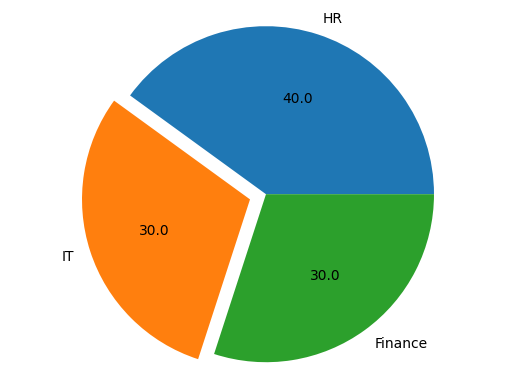

In [19]:
plt.pie(count, labels=count.index, autopct="%1.1f", explode=[0,0.1,0])
plt.axis("equal") # make pie-chart an equal circle
plt.show()

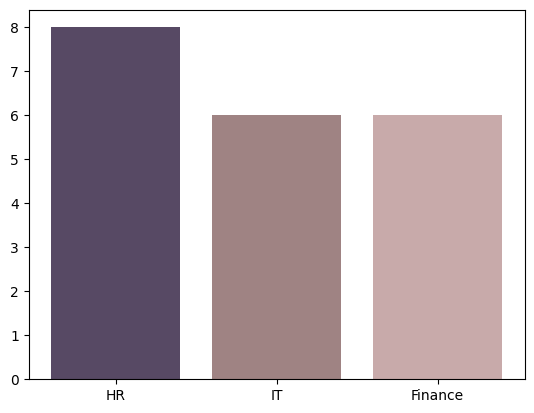

In [20]:
# countplot
plt.bar(count.index, count, color=["#574964","#9F8383","#C8AAAA"])
plt.show()

### Bivariate: Numerical - Numerical

In [21]:
df["Age"] = [22, 25, 29, 24, 30, 35, 40, 36, 28, 22,
             23, 25, 26, 24, 31, 29, 27, 33, 35, 38]

In [22]:
df.head()

,Salary,Dept,Age
0,25000,HR,22
1,30000,IT,25
2,37000,Finance,29
3,28000,HR,24
4,39000,Finance,30


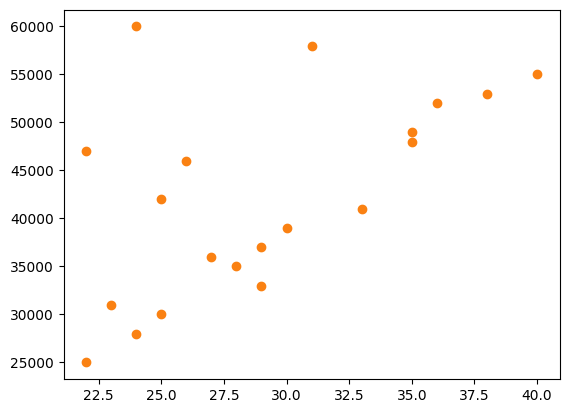

In [23]:
# scatter-plot
plt.scatter(df["Age"], df["Salary"], color="#FA8112")
plt.show()

In [24]:
sort_age = df.sort_values("Age")

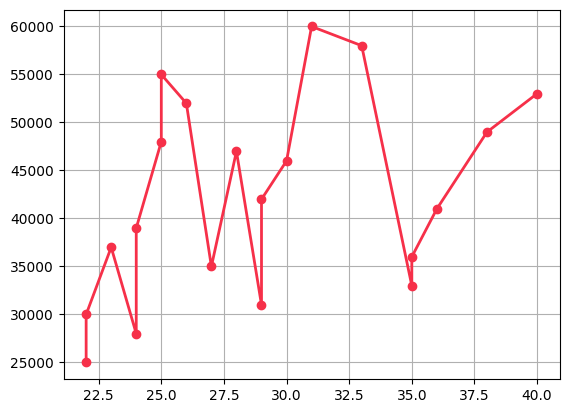

In [25]:
# line-plot
plt.plot(sort_age["Age"], df["Salary"], color="#F63049", marker="o", linewidth=2)
plt.grid()
plt.show()

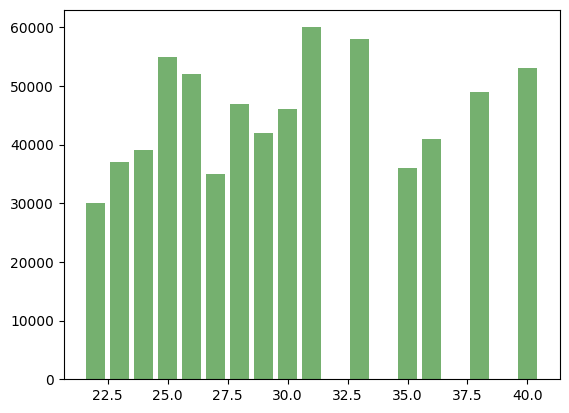

In [26]:
# bar chart
plt.bar(sort_age["Age"], df["Salary"], color="#75B06F")
plt.show()

### Bivariate: Numerical - Categorical

In [27]:
hr_sal = df[df["Dept"]=="HR"]["Salary"] 

In [28]:
hr_sal.head()

0     25000
3     28000
6     55000
9     47000
10    31000
Name: Salary, dtype: int64

In [29]:
it_sal = df[df["Dept"]=="IT"]["Salary"]

In [30]:
it_sal.head()

1     30000
5     48000
8     35000
11    42000
15    33000
Name: Salary, dtype: int64

In [31]:
finance_sal = df[df["Dept"]=="Finance"]["Salary"] 

In [32]:
finance_sal.head()

2     37000
4     39000
7     52000
12    46000
14    58000
Name: Salary, dtype: int64

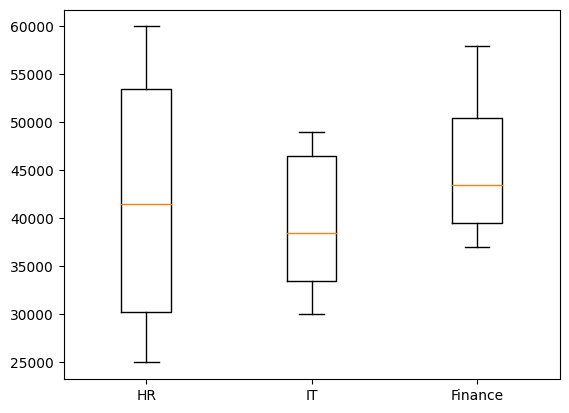

In [33]:
# box-plot
plt.boxplot([hr_sal, it_sal, finance_sal], labels=["HR", "IT", "Finance"])
plt.show()

In [34]:
# pie-chart

salary_by_Dept = df.groupby("Dept")["Salary"].sum()

salary_by_Dept

Dept
Finance    273000
HR         335000
IT         237000
Name: Salary, dtype: int64

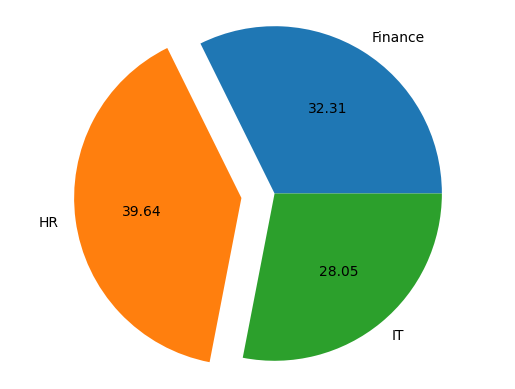

In [35]:
plt.pie(salary_by_Dept, labels= salary_by_Dept.index, autopct="%1.2f", explode=[0,0.2,0])
plt.axis("equal") # make pie-chart an equal circle
plt.show()

In [36]:
# bar-plot
hr_mean = sum(hr_sal)/len(hr_sal)
it_mean = sum(it_sal)/len(it_sal)
finance_mean = sum(finance_sal)/len(finance_sal)

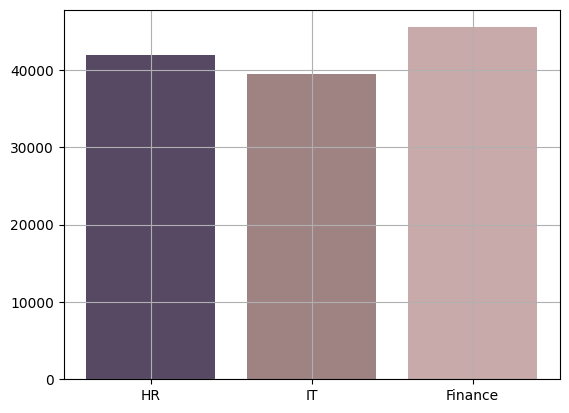

In [37]:
plt.bar(["HR", "IT", "Finance"], [hr_mean, it_mean, finance_mean], color=["#574964","#9F8383","#C8AAAA"])
plt.grid()
plt.show()

### Multivariate Analysis: 3 Numerical columns

In [38]:
df["Experience"] = [1, 2, 4, 1.5, 5, 8, 12, 10, 4, 1,
                    1.2, 2, 3, 1.8, 5.5, 4.5, 3.2, 7, 8, 10]

In [39]:
df.head()

,Salary,Dept,Age,Experience
0,25000,HR,22,1.0
1,30000,IT,25,2.0
2,37000,Finance,29,4.0
3,28000,HR,24,1.5
4,39000,Finance,30,5.0


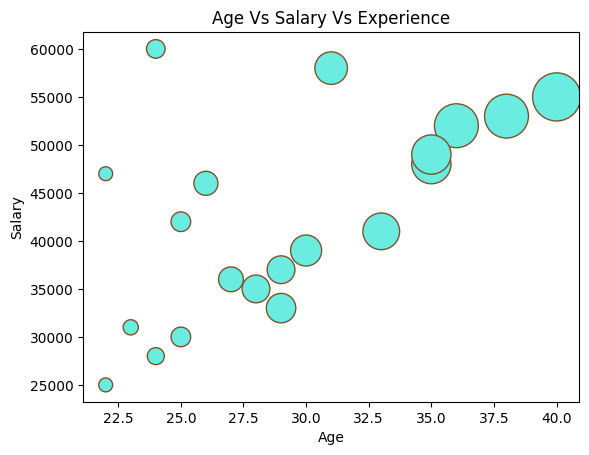

In [40]:
# bubble-plot
plt.scatter(df["Age"], df["Salary"], s=df["Experience"]*100, color="#6AECE1", edgecolor="#7B542F")
plt.title("Age Vs Salary Vs Experience")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

### Multivariate Analysis: 2 Numerical & 1 Categorical column

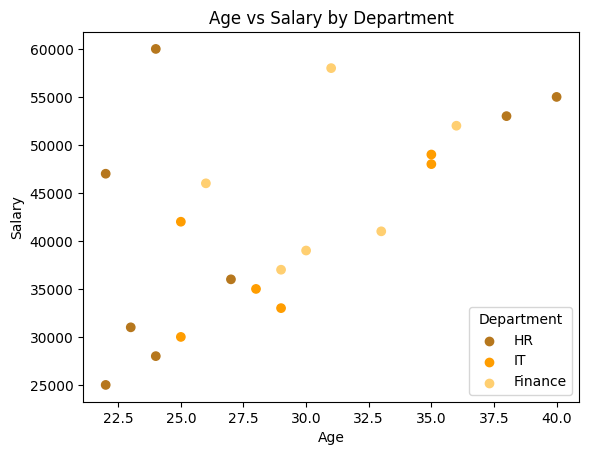

In [41]:
colors = df["Dept"].map({
    "HR": "#B6771D",
    "IT": "#FF9D00",
    "Finance": "#FFCF71"
})

plt.scatter(df["Age"], df["Salary"], c=colors)
plt.title("Age vs Salary by Department")
plt.xlabel("Age")
plt.ylabel("Salary")

# Manual legend (required)
for dept, color in {
    "HR": "#B6771D",
    "IT": "#FF9D00",
    "Finance": "#FFCF71"
}.items():
    plt.scatter([], [], c=color, label=dept)

plt.legend(title="Department")
plt.show()


## Object Oriented API

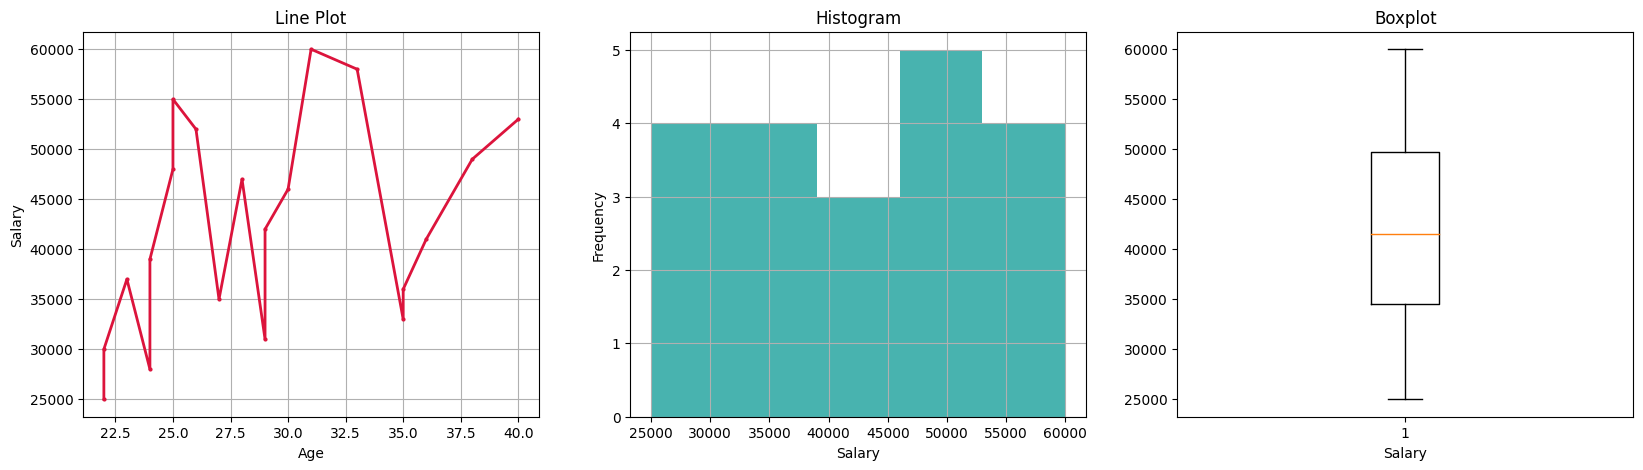

In [42]:
fig, axs = plt.subplots(1,3,figsize=(20,5))

# line-plot
axs[0].plot(sort_age["Age"], df["Salary"], color="#DC143C", marker="o", linewidth=2, markersize=2)
axs[0].grid()
axs[0].set_title("Line Plot")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Salary")

# histogram
axs[1].hist( df["Salary"], bins=5, color="#48B3AF")
axs[1].grid()
axs[1].set_title("Histogram")
axs[1].set_xlabel("Salary")
axs[1].set_ylabel("Frequency")

# box-plot
axs[2].boxplot(df["Salary"])
axs[2].set_title("Boxplot")
axs[2].set_xlabel("Salary")

# Save figure
plt.savefig("multiple_plots.png") # .png/.jpg/.jpeg/.pdf

# Display figure
plt.show()

In [43]:
data2 = {
    "Year": [2020, 2021, 2022, 2023],
    "Sales": [100, 150, 200, 250],
    "Profit": [20, 30, 40, 50],
    "Expenses": [80, 120, 160, 200]
}

In [47]:
financial_df = pd.DataFrame(data2)

In [48]:
financial_df.head()

,Year,Sales,Profit,Expenses
0,2020,100,20,80
1,2021,150,30,120
2,2022,200,40,160
3,2023,250,50,200


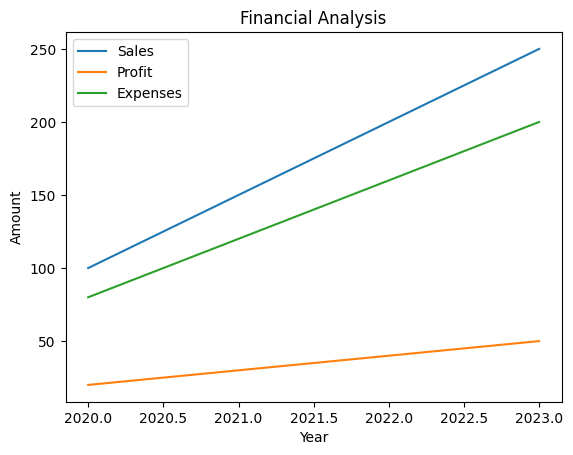

In [50]:
plt.plot(financial_df["Year"], financial_df["Sales"], label="Sales")
plt.plot(financial_df["Year"], financial_df["Profit"], label="Profit")
plt.plot(financial_df["Year"], financial_df["Expenses"], label="Expenses")

plt.title("Financial Analysis")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend()
plt.show()

## 3D Plot

In [51]:
df.head()

,Salary,Dept,Age,Experience
0,25000,HR,22,1.0
1,30000,IT,25,2.0
2,37000,Finance,29,4.0
3,28000,HR,24,1.5
4,39000,Finance,30,5.0


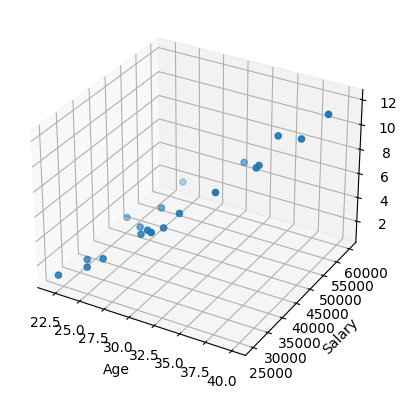

In [54]:
ax = plt.axes(projection="3d")

ax.scatter(df["Age"], df["Salary"], df["Experience"])
ax.set_xlabel("Age")
ax.set_ylabel("Salary")
ax.set_zlabel("Experience")

plt.show()

In [57]:
fig = px.scatter_3d(
    df,
    x="Age",
    y="Salary",
    z="Experience",
    color="Dept",
    color_discrete_map={
        "HR": "#1f77b4",
        "IT": "#ff7f0e",
        "Finance": "#2ca02c"
    },
    title="3D Scatter Plot: Age vs Salary vs Experience"
)

fig.show()